In [1]:
# Importando as bibliotecas necessárias
from sklearn.datasets import fetch_lfw_people  # Para carregar o dataset LFW
from sklearn.model_selection import train_test_split  # Para dividir o dataset em treino e teste
from sklearn.decomposition import PCA  # Para redução de dimensionalidade
from sklearn.svm import SVC  # Para o classificador SVM
from sklearn.metrics import classification_report, confusion_matrix  # Para avaliação do modelo
from sklearn.preprocessing import StandardScaler  # Para normalizar os dados
import matplotlib.pyplot as plt  # Para visualização das imagens e resultados

In [2]:
# 1. Carregar o dataset LFW (Labeled Faces in the Wild)
# O parâmetro `min_faces_per_person` define o número mínimo de imagens que uma pessoa deve ter no dataset.
# O parâmetro `resize` reduz o tamanho das imagens para acelerar o processamento (0.4 = 40% do tamanho original).
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
# 2. Explorar os dados
# O dataset contém imagens, rótulos (nomes das pessoas) e outras informações.
n_samples, h, w = lfw_people.images.shape  # Número de amostras, altura e largura das imagens
X = lfw_people.data  # Dados de características (cada imagem achatada em um vetor 1D)
y = lfw_people.target  # Rótulos (as pessoas representadas nas imagens)
target_names = lfw_people.target_names  # Nomes das pessoas (as classes)

# Exibindo algumas informações sobre o dataset
print(f"Número de amostras: {n_samples}")
print(f"Dimensões da imagem: {h} x {w}")
print(f"Número de características (pixels por imagem): {X.shape[1]}")
print(f"Número de classes (pessoas): {len(target_names)}")

Número de amostras: 1288
Dimensões da imagem: 50 x 37
Número de características (pixels por imagem): 1850
Número de classes (pessoas): 7


In [4]:
# 3. Dividir os dados em conjuntos de treino e teste
# `test_size=0.25` significa que 25% dos dados serão usados para teste, e 75% para treino.
# `random_state=42` é uma semente aleatória para garantir que a divisão dos dados seja a mesma em execuções futuras.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# 4. Normalizar os dados
# A normalização ajuda a melhorar o desempenho do modelo, ajustando as características para que tenham média 0 e desvio padrão 1.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta o scaler nos dados de treino e os transforma
X_test = scaler.transform(X_test)  # Transforma os dados de teste usando o mesmo scaler


In [6]:
# 5. Redução de dimensionalidade com PCA (Principal Component Analysis)
# PCA reduz o número de características (dimensionalidade) ao capturar a maior parte da variabilidade dos dados.
# O parâmetro `n_components` define quantos componentes principais serão mantidos.
n_components = 150
print("Aplicando PCA para redução de dimensionalidade...")
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)  # Transforma os dados de treino para o novo espaço de componentes principais
X_test_pca = pca.transform(X_test)  # Transforma os dados de teste para o novo espaço de componentes principais

print(f"Dimensionalidade original: {X_train.shape[1]}")
print(f"Dimensionalidade reduzida: {X_train_pca.shape[1]}")

Aplicando PCA para redução de dimensionalidade...
Dimensionalidade original: 1850
Dimensionalidade reduzida: 150


In [7]:
# 6. Treinar um classificador SVM (Support Vector Machine)
# O SVM com kernel RBF é um modelo robusto para classificação. 
# Aqui, estamos usando `C=1000` e `gamma=0.005` como hiperparâmetros.
print("Treinando o modelo SVM...")
clf = SVC(kernel='rbf', class_weight='balanced', C=1000, gamma=0.005)
clf.fit(X_train_pca, y_train)  # Treina o modelo usando os dados de treino reduzidos pelo PCA

Treinando o modelo SVM...


SVC(C=1000, class_weight='balanced', gamma=0.005)

In [8]:
# 7. Avaliar o modelo no conjunto de teste
# Faz previsões no conjunto de teste
y_pred = clf.predict(X_test_pca)
# Exibe um relatório de classificação, mostrando a precisão, recall e F1-score para cada classe
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Exibe a matriz de confusão, mostrando a quantidade de predições corretas e incorretas para cada classe
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred, labels=range(len(target_names))))

Relatório de Classificação:
                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.62      0.70        13
     Colin Powell       0.75      0.90      0.82        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.87      0.97      0.92       146
Gerhard Schroeder       1.00      0.76      0.86        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.93      0.78      0.85        36

         accuracy                           0.86       322
        macro avg       0.89      0.74      0.80       322
     weighted avg       0.87      0.86      0.85       322

Matriz de Confusão:
[[  8   1   0   4   0   0   0]
 [  2  54   0   4   0   0   0]
 [  0   5  17   5   0   0   0]
 [  0   4   0 142   0   0   0]
 [  0   2   0   3  19   0   1]
 [  0   5   0   1   0   8   1]
 [  0   1   2   5   0   0  28]]


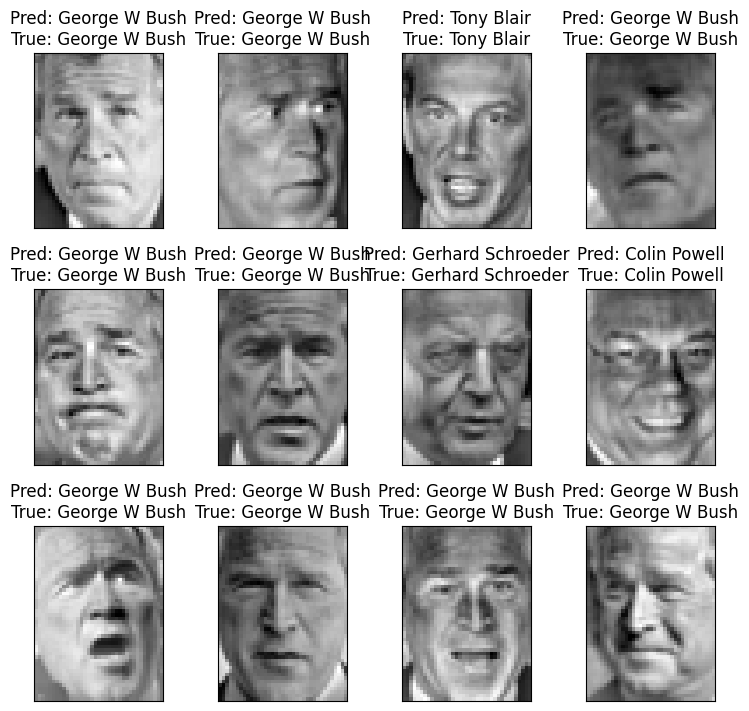

In [9]:
# 8. Visualizar alguns resultados
# Função para visualizar uma galeria de imagens com seus títulos
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))  # Define o tamanho da figura
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)  # Ajusta o espaçamento entre subplots
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)  # Cria subplots em uma grade
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)  # Exibe a imagem em tons de cinza
        plt.title(titles[i], size=12)  # Define o título do subplot
        plt.xticks(())  # Remove os ticks no eixo x
        plt.yticks(())  # Remove os ticks no eixo y

# Função para gerar o título com a predição e o rótulo verdadeiro
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]  # Nome predito
    true_name = target_names[y_test[i]]  # Nome verdadeiro
    return f"Pred: {pred_name}\nTrue: {true_name}"

# Gerar títulos para as imagens de teste
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

# Exibir uma galeria de imagens com os títulos das previsões e os rótulos verdadeiros
plot_gallery(X_test, prediction_titles, h, w)
plt.show()  # Mostrar a figura